# Modelos Comparativos

En este notebook, se compararán diferentes modelos de predicción de precios de arriendo para propiedades residenciales en los municipios del Valle de Aburrá, Antioquia. Los modelos que se evaluarán incluyen Random Forest y Regresión Lineal.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Cargar datos
def load_data(filepath):
    df = pd.read_excel(filepath)
    df['precio_log'] = np.log1p(df['precio'])
    df = df.drop(columns=['precio'])
    return df

# Procesamiento de datos
def preprocess_data_rf(df):
    target = 'precio_log'
    categorical_features = ['ciudad', 'antiguedad', 'comuna', 'zona', 'tipo_de_inmueble', 'estado']
    numerical_features = df.drop(columns=categorical_features + [target]).columns.tolist()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )
    
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return preprocessor, X_train, X_test, y_train, y_test

# Modelo de Random Forest
def train_random_forest(X_train, X_test, y_train, y_test, preprocessor):
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)    
    #Reescalar el precio
    predictions = np.expm1(predictions)
    y_test = np.expm1(y_test)

    evaluate_model(predictions, y_test)

    return model, predictions

# Modelo de Regresión Lineal
def train_linear_regression(X_train, X_test, y_train, y_test, preprocessor):
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    #Reescalar el precio
    predictions = np.expm1(predictions)
    y_test = np.expm1(y_test)

    evaluate_model(predictions, y_test)  

    return model, predictions



# Evaluación de los modelos
def evaluate_model(predictions, y_test):
    print(f"MAE: {mean_absolute_error(y_test, predictions)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")
    print(f"R2 Score: {r2_score(y_test, predictions)}")
    
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ticklabel_format(style='plain')
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Valores reales vs Predicciones")
    plt.show()

# Pipeline principal
def main(filepath):
    df = load_data(filepath)
    preprocessor, X_train, X_test, y_train, y_test = preprocess_data_rf(df)
    
    print("Entrenando Random Forest...")
    rf_model, rf_predictions = train_random_forest(X_train, X_test, y_train, y_test, preprocessor)

    print("Entrenando Regresión Lineal...")
    lr_model, lr_predictions = train_linear_regression(X_train, X_test, y_train, y_test, preprocessor)
    
    return rf_model, lr_model


Entrenando Random Forest...
MAE: 781121.0825159303
RMSE: 1764827.7359433402
R2 Score: 0.815307879982401


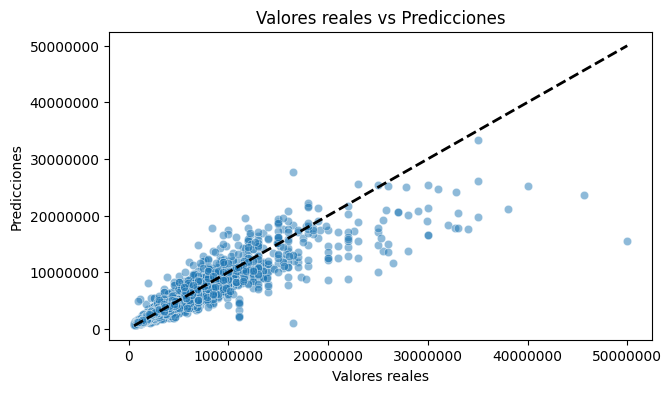

Entrenando Regresión Lineal...
MAE: 985475.4208837146
RMSE: 2469525.957110874
R2 Score: 0.6383646168086041


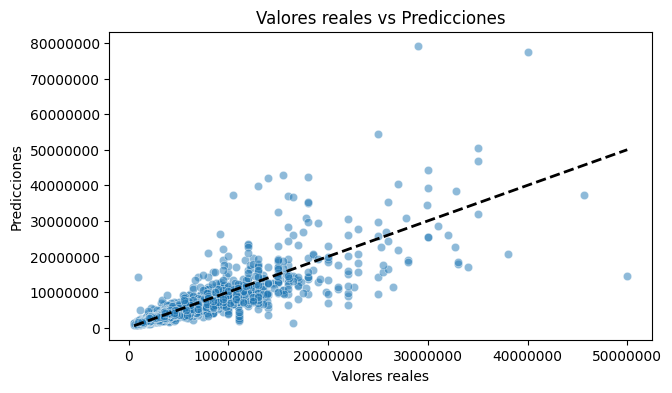

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['latitud', 'longitud',
                                                    'habitaciones', 'banos',
                                                    'area_construida_m2',
                                                    'area_privada_m2', 'estrato',
                                                    'pisos_edificio',
                                                    'piso_ubicacion',
                                                    'parqueaderos',
                                                    'gastos_comunes',
                                                    'dias_desde_actualizado',
                                                    'sentimiento',
                                                    'exclusividad', 'amenidades',
                                                    'infraestructura_y_accesi

In [4]:

# Llamar a la función principal
main('../data/processed/data_arriendos_model.xlsx')